<a href="https://colab.research.google.com/github/jean18/Coursera/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

# Apply the default theme
sns.set()

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# change this with your ubication
url = '/content/gdrive/MyDrive/Getting Started With Tensorflow 2/Capstone Project'

In [ ]:
# Load the dataset from your Drive folder

train = loadmat(url + '/train_32x32.mat')
test = loadmat(url + '/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
# extract the training and testing images and labels
x_train, y_train = train['X'], train['y']
x_test, y_test = test['X'], test['y']

In [ ]:
# shape of data
print('x_train shape: ' + str(x_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('x_test shape: ' + str(x_test.shape))
print('y_test shape: ' + str(y_test.shape))

x_train shape: (32, 32, 3, 73257)
y_train shape: (73257, 1)
x_test shape: (32, 32, 3, 26032)
y_test shape: (26032, 1)


<div class="alert-block alert-info">
            <b>Note:</b> We have 73.257 examples for training and 26.032 examples for testing, both with shape of (32, 32, 3)
</div>

In [ ]:
# reshape the data
x_train = np.transpose(x_train, [3, 0, 1, 2]) # from HWCN to NHWC
y_train = np.reshape(y_train, -1) 
x_test = np.transpose(x_test, [3, 0, 1, 2])
y_test = np.reshape(y_test, -1)
print('x_train new shape: ' + str(x_train.shape))
print('y_train new shape: ' + str(y_train.shape))
print('x_test new shape: ' + str(x_test.shape))
print('y_test new shape: ' + str(y_test.shape))

x_train new shape: (73257, 32, 32, 3)
y_train new shape: (73257,)
x_test new shape: (26032, 32, 32, 3)
y_test new shape: (26032,)


<div class="alert-block alert-info">
            <b>Note:</b> The documentation show that we have 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
</div>

In [ ]:
# label '0' -> 10
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [ ]:
# use one hot enconding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

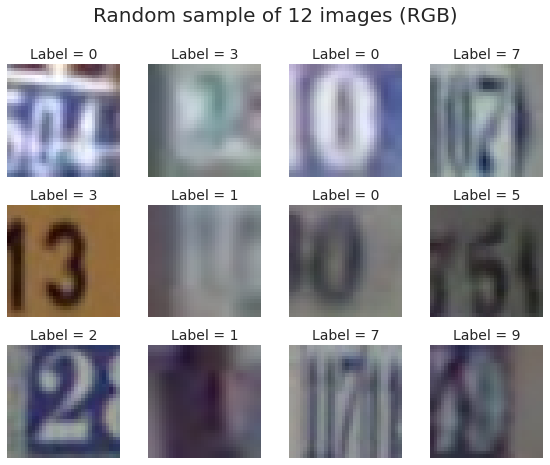

In [ ]:
# select a random sample of images and corresponding labels

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))

# title
fig.suptitle('Random sample of 12 images (RGB)', fontsize=20, y=1.07)

# Select 12 random images without duplicates (replace=False)
random=np.random.choice(x_train.shape[0], 12, replace=False)

for i, axi in enumerate(ax.flat):

    img = x_train[random[i], :, :, :]
    axi.set_axis_off()
    axi.imshow(img)
    axi.set_title('Label = {}'.format(np.argmax(y_train[random[i]], axis=0)), fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# convert the training and test images to grayscale and rescale the image values
x_train_gs = np.mean(x_train, axis=-1, keepdims=True)/255.0
x_test_gs = np.mean(x_test, axis=-1, keepdims=True)/255.0

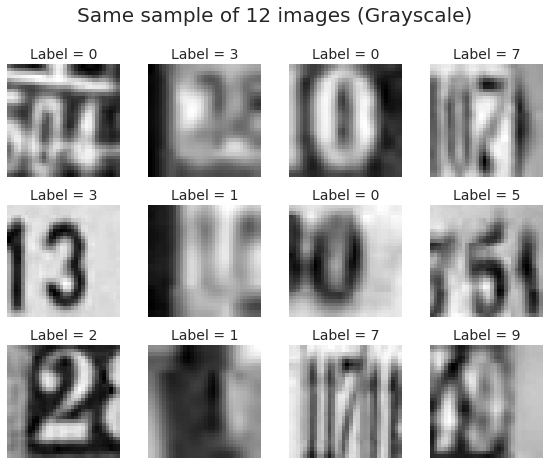

In [ ]:
# select same images but, now in grayscale

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))

# title
fig.suptitle('Same sample of 12 images (Grayscale)', fontsize=20, y=1.07)

for i, axi in enumerate(ax.flat):

    img = x_train_gs[random[i], :, :, 0] 
    axi.set_axis_off()
    axi.imshow(img, cmap=("gray"))
    axi.set_title('Label = {}'.format(np.argmax(y_train[random[i]], axis=0)), fontsize=14)

plt.tight_layout()
plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def get_model_mlp(input_shape):

    model = Sequential([
        Dense(8, activation='relu', input_shape=input_shape),
        Dense(8, activation='relu'),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model

In [ ]:
# get the model
model = get_model_mlp(input_shape=x_train_gs[0].shape)

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 8)         16        
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 8)         72        
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                131088    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 131,346
Trainable params: 131,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# callbacks for the model

#checkpoint
checkpoint_path_mlp = 'checkpoint_model_mlp/checkpoints'
checkpoint_mlp = ModelCheckpoint(filepath=checkpoint_path_mlp, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# reduce lr
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
# train the model
history = model.fit(x_train_gs, y_train, epochs=30, validation_split=0.15, callbacks=[checkpoint_mlp, early_stopping, reduce_lr])

Epoch 1/30
1946/1946 [==============================] - 19s 9ms/step - loss: 2.2092 - accuracy: 0.1739 - val_loss: 2.0896 - val_accuracy: 0.2219
Epoch 2/30
1946/1946 [==============================] - 18s 9ms/step - loss: 2.0699 - accuracy: 0.2297 - val_loss: 2.0548 - val_accuracy: 0.2371
Epoch 3/30
1946/1946 [==============================] - 18s 9ms/step - loss: 2.0454 - accuracy: 0.2397 - val_loss: 2.0482 - val_accuracy: 0.2474
Epoch 4/30
1946/1946 [==============================] - 18s 9ms/step - loss: 2.0309 - accuracy: 0.2490 - val_loss: 2.0336 - val_accuracy: 0.2482
Epoch 5/30
1946/1946 [==============================] - 19s 10ms/step - loss: 2.0198 - accuracy: 0.2536 - val_loss: 2.0311 - val_accuracy: 0.2527
Epoch 6/30
1946/1946 [==============================] - 17s 9ms/step - loss: 2.0146 - accuracy: 0.2598 - val_loss: 2.0202 - val_accuracy: 0.2578
Epoch 7/30
1946/1946 [==============================] - 18s 9ms/step - loss: 2.0040 - accuracy: 0.2645 - val_loss: 2.0168 - val_a

In [ ]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,2.155103,0.196056,2.089617,0.221949,0.001
1,2.061658,0.231515,2.054826,0.237055,0.001
2,2.041183,0.244395,2.048234,0.247429,0.001
3,2.028422,0.249775,2.033569,0.248248,0.001
4,2.017835,0.254786,2.031054,0.252707,0.001


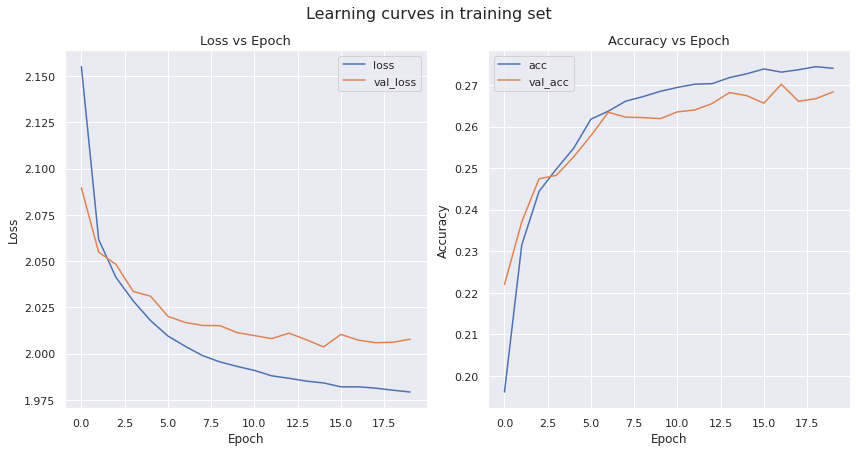

In [ ]:
# plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Learning curves in training set', fontsize=16, y=1.04)

sns.lineplot(x=df.index , y='loss', data=df, ax=ax[0], label='loss')
sns.lineplot(x=df.index, y='val_loss', data=df, ax=ax[0], label='val_loss')
ax[0].set_title('Loss vs Epoch', fontsize=13)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')

sns.lineplot(x=df.index , y='accuracy', data=df, ax=ax[1], label='acc')
sns.lineplot(x=df.index, y='val_accuracy', data=df, ax=ax[1], label='val_acc')
ax[1].set_title('Accuracy vs Epoch', fontsize=13)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')

plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# compute and display the loss and accuracy of the trained model on the test set

loss, accuracy = model.evaluate(x_test_gs, y_test)
print('\nLoss and accuracy on test set')
print('------------------------------------------------------------')
print('Loss: ', loss, '| Accuracy: ', accuracy)
print('------------------------------------------------------------')

814/814 [==============================] - 3s 3ms/step - loss: 2.0557 - accuracy: 0.2744

Loss and accuracy on test set
------------------------------------------------------------
Loss:  2.05572772026062 | Accuracy:  0.27435463666915894
------------------------------------------------------------


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def get_model_cnn(input_shape):

    model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                    MaxPool2D((3, 3)),
                    BatchNormalization(),
                    Conv2D(32, (4, 4), activation='relu'),
                    MaxPool2D((4, 4)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
    ])

    return model

In [ ]:
# get the model
model = get_model_cnn(x_train_gs[0].shape)

In [ ]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#checkpoint
checkpoint_path_cnn = 'checkpoint_model_cnn/checkpoints'
checkpoint_cnn = ModelCheckpoint(filepath=checkpoint_path_cnn, monitor='val_loss', save_best_only=True, save_weights_only=True)

In [ ]:
# train the model
history = model.fit(x_train_gs, y_train, epochs=30, validation_split=0.15, callbacks=[checkpoint_cnn, early_stopping, reduce_lr])

Epoch 1/30
1946/1946 [==============================] - 48s 25ms/step - loss: 1.5379 - accuracy: 0.4781 - val_loss: 0.8036 - val_accuracy: 0.7466
Epoch 2/30
1946/1946 [==============================] - 47s 24ms/step - loss: 0.8329 - accuracy: 0.7420 - val_loss: 0.6900 - val_accuracy: 0.7836
Epoch 3/30
1946/1946 [==============================] - 48s 24ms/step - loss: 0.7370 - accuracy: 0.7734 - val_loss: 0.6864 - val_accuracy: 0.7815
Epoch 4/30
1946/1946 [==============================] - 48s 24ms/step - loss: 0.6804 - accuracy: 0.7921 - val_loss: 0.6773 - val_accuracy: 0.7855
Epoch 5/30
1946/1946 [==============================] - 47s 24ms/step - loss: 0.6515 - accuracy: 0.8034 - val_loss: 0.6956 - val_accuracy: 0.7809
Epoch 6/30
1946/1946 [==============================] - 48s 25ms/step - loss: 0.6381 - accuracy: 0.8039 - val_loss: 0.6824 - val_accuracy: 0.7889
Epoch 7/30
1946/1946 [==============================] - 47s 24ms/step - loss: 0.6203 - accuracy: 0.8085 - val_loss: 0.5856 -

In [ ]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.193526,0.610860,0.803591,0.746565,0.001
1,0.804378,0.751381,0.689955,0.783602,0.001
2,0.726620,0.777044,0.686414,0.781509,0.001
3,0.682201,0.792301,0.677344,0.785513,0.001
4,0.654328,0.801278,0.695605,0.780872,0.001


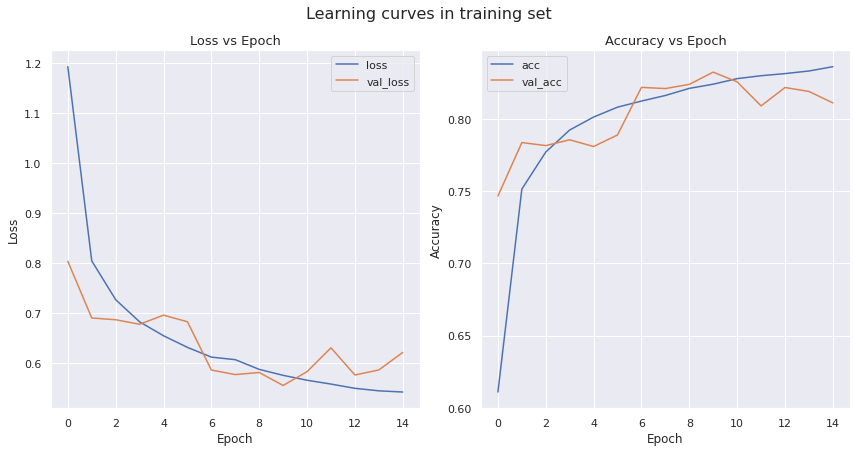

In [ ]:
# plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Learning curves in training set', fontsize=16, y=1.04)

sns.lineplot(x=df.index , y='loss', data=df, ax=ax[0], label='loss')
sns.lineplot(x=df.index, y='val_loss', data=df, ax=ax[0], label='val_loss')
ax[0].set_title('Loss vs Epoch', fontsize=13)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')

sns.lineplot(x=df.index , y='accuracy', data=df, ax=ax[1], label='acc')
sns.lineplot(x=df.index, y='val_accuracy', data=df, ax=ax[1], label='val_acc')
ax[1].set_title('Accuracy vs Epoch', fontsize=13)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')

plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# compute and display the loss and accuracy of the trained model on the test set

loss, accuracy = model.evaluate(x_test_gs, y_test)
print('\nLoss and accuracy on test set')
print('------------------------------------------------------------')
print('Loss: ', loss, '| Accuracy: ', accuracy)
print('------------------------------------------------------------')

814/814 [==============================] - 6s 8ms/step - loss: 0.6293 - accuracy: 0.8087

Loss and accuracy on test set
------------------------------------------------------------
Loss:  0.6292822360992432 | Accuracy:  0.8086585998535156
------------------------------------------------------------


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
# Load the best weights for the MLP and CNN models that you saved during the training run.

# get models 
model_mlp=get_model_mlp(x_train_gs[0].shape)
model_cnn=get_model_cnn(x_train_gs[0].shape)

# load weights
model_mlp.load_weights(checkpoint_path_mlp)
model_cnn.load_weights(checkpoint_path_cnn)

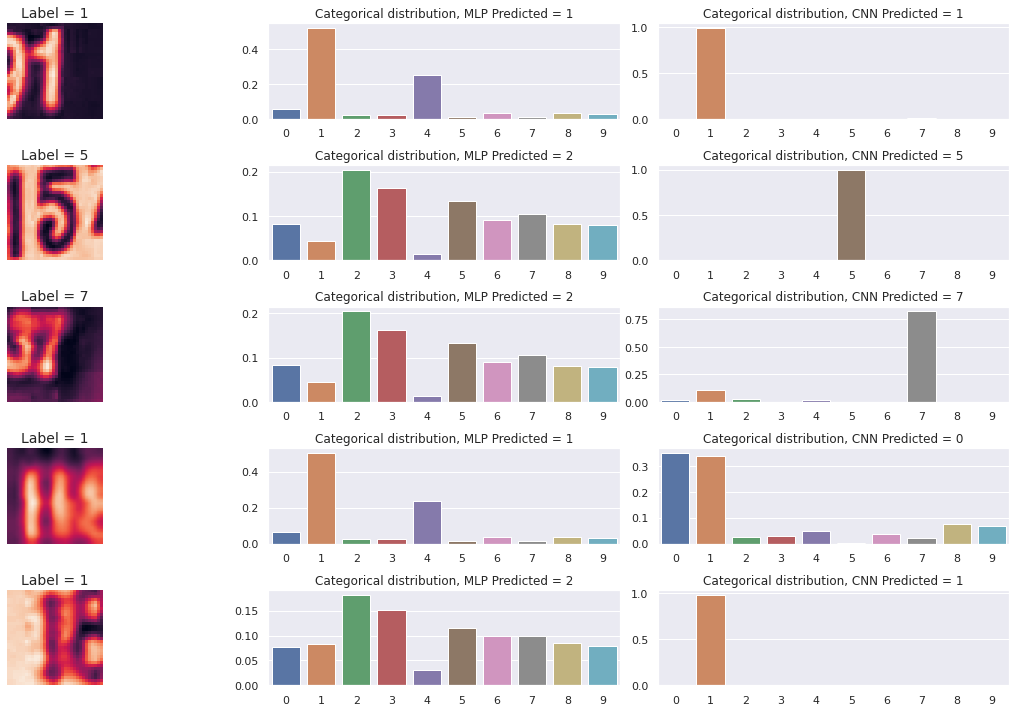

In [113]:
# Randomly select 5 images and corresponding labels from the test set and display the images with their labels.

# Select 5 random examples without duplicates (replace=False)
random=np.random.choice(x_test_gs.shape[0], 5, replace=False)

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.4)

j = 0
for i, axi in enumerate(ax.flat):

    img = x_test_gs[random[j], :, :, 0]

    if(i%3)==0: # display image with label
      axi.set_axis_off()
      axi.imshow(img)
      axi.set_title('Label = {}'.format(np.argmax(y_test[random[j]], axis=0)), fontsize=14)

    if(i%3)==1: # diplay barplot using mlp
      result = model_mlp.predict(img[np.newaxis, ...])
      sns.barplot(x=list(range(10)), y=result[0], ax=axi)
      axi.set_title('Categorical distribution, MLP Predicted = {}'.format(np.argmax(result)), fontsize=12)

    if(i%3)==2: # diplay barplot using cnn
      result = model_cnn.predict(img[np.newaxis, ..., np.newaxis])
      sns.barplot(x=list(range(10)), y=result[0], ax=axi)
      axi.set_title('Categorical distribution, CNN Predicted = {}'.format(np.argmax(result)), fontsize=12)
      j+=1

plt.tight_layout()
plt.show()